In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('finalized.csv')

In [4]:
df.head(2)

,Unnamed: 0,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,1,2,0,1,1,66,57,14,...,5.613818,-32.621258,-55.788514,-54.075668,3.277048,12.701243,14.444472,-28.278374,-41.664311,-10.190590
1,1,1,3,4,0,4,1,51,88,8,...,-6.675118,-38.421278,-63.571089,-83.859878,3.667343,35.065960,66.988533,-35.691742,-34.204698,-25.940935


In [5]:
df.shape

(404290, 223)

In [7]:
X = df.drop(['Unnamed: 0','id','qid1','qid2','is_duplicate'],axis = 'columns')

In [9]:
y = df['is_duplicate']

### Random train test split( 70:30) 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [15]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283003, 218)
Number of data points in test data : (121287, 218)


In [17]:
from collections import Counter

In [23]:
#eg : of collection Counter 

a = [1,2,3,4,5,2,3,3,2,1,2,3]
c = Counter(a)
c

Counter({1: 2, 2: 4, 3: 4, 4: 1, 5: 1})

In [28]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308025003268517 Class 1:  0.36919749967314835
---------- Distribution of output variable in train data ----------
Class 0:  0.6308013224830361 Class 1:  0.3691986775169639


# <h1 style="text-align:center;font-size:30px;" > SGD Classifier </h1>

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [32]:
clf = SGDClassifier( penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=42)

In [33]:
pred_sgd = clf.predict(X_test)

In [34]:
print("first 20 actual labels")
print(y_test.tolist()[:20])
print("first 20 predicted labels")
print(pred_sgd.tolist()[:20])

first 20 actual labels
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]
first 20 predicted labels
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]


In [42]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, pred_sgd)
    cof=pd.DataFrame(cof, index=[i for i in range(1,3)], columns=[i for i in range(1,3)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['is_duplicate','not_duplicate'],yticklabels=['is_duplicate','not_duplicate']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

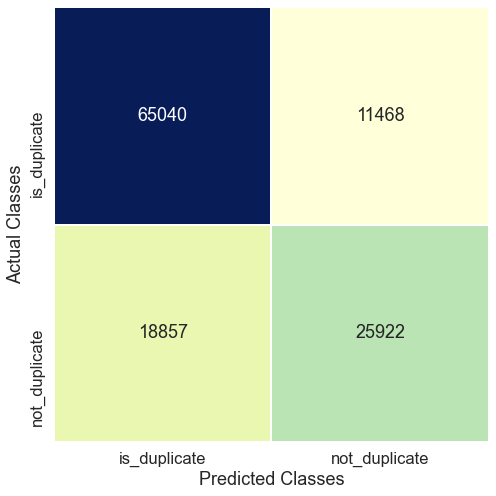

In [43]:
confusion_mat('YlGnBu')

In [55]:
print('\nClassification Report\n')
print(classification_report(y_test,pred_sgd))


Classification Report

              precision    recall  f1-score   support

           0       0.78      0.85      0.81     76508
           1       0.69      0.58      0.63     44779

    accuracy                           0.75    121287
   macro avg       0.73      0.71      0.72    121287
weighted avg       0.74      0.75      0.74    121287



### Accuracy

In [38]:
acc = round(accuracy_score(y_test,pred_sgd)*100,4)
err = round(100-accuracy_score(y_test,pred_sgd)*100,4)
print('Accuracy:',acc)
print('Error:',err)

Accuracy: 74.9973
Error: 25.0027


# <h1 style="text-align:center;font-size:30px;" > Decision Tree </h1>

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train,y_train)
pred_dtg = dt_model.predict(X_test)

In [51]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, pred_dtg)
    cof=pd.DataFrame(cof, index=[i for i in range(1,3)], columns=[i for i in range(1,3)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['is_duplicate','not_duplicate'],yticklabels=['is_duplicate','not_duplicate']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

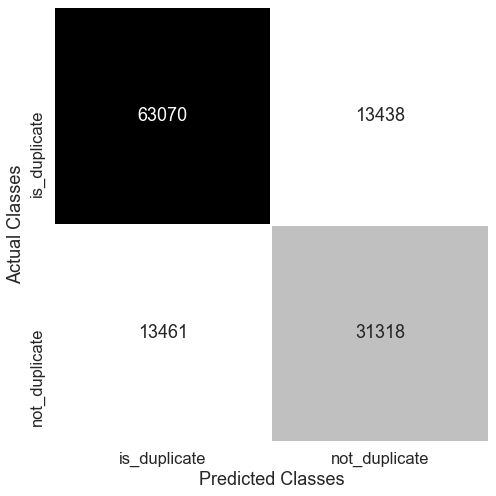

In [52]:
confusion_mat('Greys')

In [54]:
print('\nClassification Report\n')
print(classification_report(y_test,pred_dtg))


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     76508
           1       0.70      0.70      0.70     44779

    accuracy                           0.78    121287
   macro avg       0.76      0.76      0.76    121287
weighted avg       0.78      0.78      0.78    121287



In [53]:
acc3 = round(accuracy_score(y_test,pred_dtg)*100,4)
err3 = round(100-accuracy_score(y_test,pred_dtg)*100,4)
print('Accuracy:',acc3)
print('Error:',err3)

Accuracy: 77.822
Error: 22.178


# Comparison of Accuracies of Different Models for Dtrain and Dtest

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

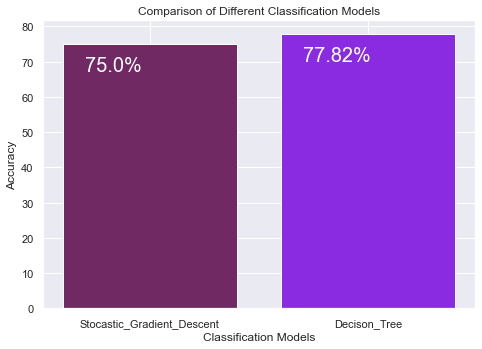

In [57]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ["Stocastic_Gradient_Descent","Decison_Tree"]
Accuracy=[acc,acc3]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-7.8, str(round(i.get_height(),2))+'%', fontsize=20, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();